---
# Análise exploratória de dados - Bootcamp de Ciência de dados AVANTI
Cientistas de dados:

*   Fernando da Conceição Cordeiro Filho
*   David William A. Oliveira
*   José Vitor Paulino Delmiro
*   Maria Eduarda Justino

Este projeto foi ministrado pelo professor Madson Luiz Dantas Dias

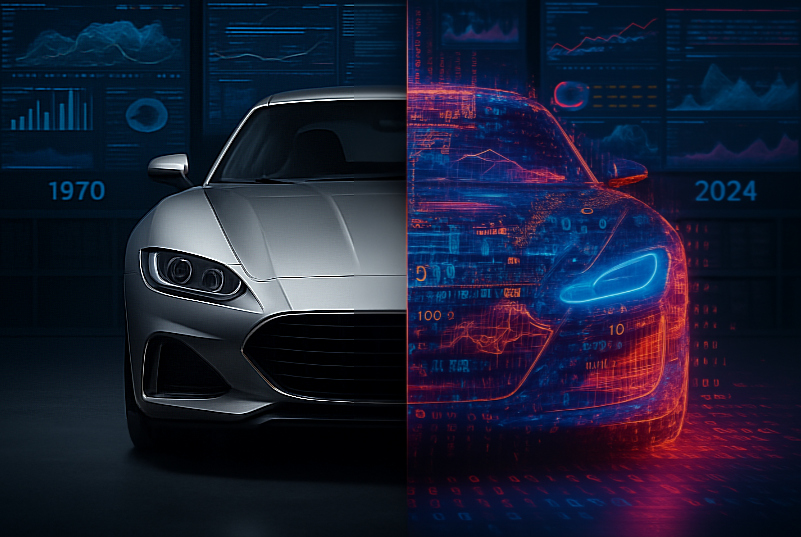


# Descrição do conjunto de dados: **Cars Data From 1970 to 2024** (Modelo de carros de 1970 a 2024)





O conjunto de dados a seguir contém informações de mais de 90.000 veículos automotivos dentro do período de 1970 até 2024, e dentre as características nas quais eles estao sendo categorizados temos variáveis como: modelo de carro, ano, preço, tipo de transmissão, quilometragem e algumas outras características.
---

## Preparação
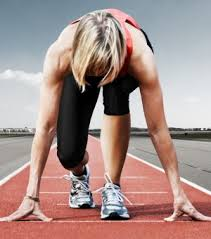
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados



In [ ]:
# @title Bibliotecas usadas

import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import Markdown



In [ ]:
# @title Leitura do conjunto de dados
df = pd.read_csv(
    "https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/cars-90000.csv"
)

In [ ]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford

### Ultimas linhas

model  year  price transmission  mileage fuelType  tax   mpg  \
97707        Fiesta  2017  10447    Automatic     8337   Petrol  145  54.3   
97708      3 Series  2014  14995       Manual    25372   Diesel   30  61.4   
97709        Fiesta  2017   8950       Manual    19910   Petrol  125  54.3   
97710         Astra  2017  10700    Automatic    24468   Petrol  125  50.4   
97711   Grandland X  2019  15798       Manual    10586   Diesel  150  48.7   

       engineSize Manufacturer  
97707         1.0         ford  
97708         2.0          BMW  
97709         1.2         ford  
97710         1.4     vauxhall  
97711         1.5     vauxhall

### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


### Quantidade de valores únicos

model             196
year               27
price           13236
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               208
engineSize         40
Manufacturer        9
dtype: int64

---
As informações iniciais indicam que:
 - O conjunto de dados tem 97712 unidades amostrais com 10 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `price`, `mileage`, `tax`, `mpg`, `engineSize`
    - Quantitativa discreta: ---
    - Qualitativa nominal: `model`, `transmission`, `fuelType`, `Manufacturer`
    - Qualitativa ordinal: `year`
---

# Descrição dos dados

In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "model",
        "descricao": "O modelo do carro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "year",
        "descricao": "Ano de fabricação do carro",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal",
    },
    {
        "variavel": "price",
        "descricao": "O valor do veículo.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "transmission",
        "descricao": "Se é manual, semi ou automático.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "mileage",
        "descricao": "A quilometragem do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "fuelType",
        "descricao": "O tipo de combustível usado pelo carro.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },
    {
        "variavel": "tax",
        "descricao": "A taxa de imposto aplicável ao carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
       "variavel": "mpg",
        "descricao": "A eficiência de kilometros por galão do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "engineSize",
        "descricao": "O tamanho do motor do carro.",
        "tipo": "Quantitativa",
        "subtipo": "Contínua",
    },
    {
        "variavel": "Manufacturer",
        "descricao": "O fabricante do carro.",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    }
])
df_dict

variavel                                       descricao          tipo  \
0         model                               O modelo do carro   Qualitativa   
1          year                      Ano de fabricação do carro   Qualitativa   
2         price                             O valor do veículo.  Quantitativa   
3  transmission                Se é manual, semi ou automático.   Qualitativa   
4       mileage                       A quilometragem do carro.  Quantitativa   
5      fuelType         O tipo de combustível usado pelo carro.   Qualitativa   
6           tax           A taxa de imposto aplicável ao carro.  Quantitativa   
7           mpg  A eficiência de kilometros por galão do carro.  Quantitativa   
8    engineSize                    O tamanho do motor do carro.  Quantitativa   
9  Manufacturer                          O fabricante do carro.   Qualitativa   

    subtipo  
0   Nominal  
1   Ordinal  
2  Contínua  
3   Nominal  
4  Contínua  
5   Nominal  
6  Contínua  
7  Contínua  
8  Contínua  
9   Nominal

## Análise univariada



In [ ]:
# @title Resumo estatístico

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

          model transmission fuelType Manufacturer
count     97712        97712    97712        97712
unique      196            4        5            9
top      Fiesta       Manual   Petrol         ford
freq       6509        55502    53982        17811


### Variáveis quantitativas

               year          price        mileage           tax           mpg  \
count  97712.000000   97712.000000   97712.000000  97712.000000  97712.000000   
mean    2017.066502   16773.487555   23219.475499    120.142408     55.205623   
std        2.118661    9868.552222   21060.882301     63.357250     16.181659   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7673.000000    125.000000     47.100000   
50%     2017.000000   14470.000000   17682.500000    145.000000     54.300000   
75%     2019.000000   20750.000000   32500.000000    145.000000     62.800000   
max     2024.000000  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  97712.000000  
mean       1.664913  
std        0.558574  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  


___
O modelo de carro mais comum é o Fiesta, e o fabricante mais frequente é a Ford

A maioria dos veículos tem transmissão manual e usa gasolina como combustível

O ano médio de fabricação dos veículos é 2017

A taxa media que se incide sob os veículos é de 120,14 tendo uma variação de 0 a 580.
___

### Distribuição de variáveis

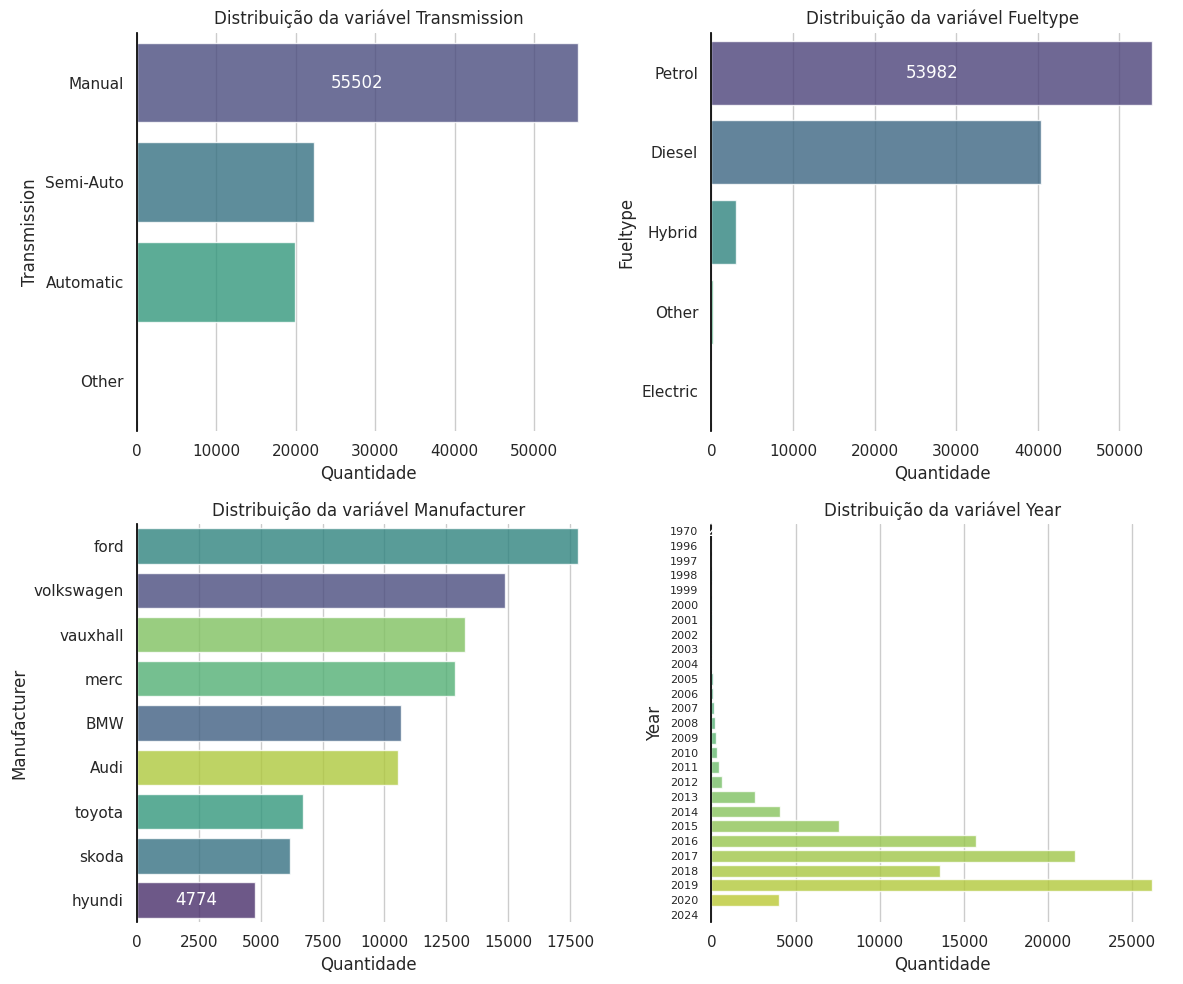

In [ ]:
# @title Variáveis qualitativas
dados_qualitativo = ['transmission', 'fuelType', 'Manufacturer', 'year']

fig, axes = plt.subplots(figsize=(12, 10), ncols=2, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(dados_qualitativo):
    if variavel == 'year':
        order = sorted(df[variavel].unique())
    else:
        order = df[variavel].value_counts().index

    ax = sns.countplot(data=df, y=variavel, ax=axes[i], order=order, alpha=.8, palette='viridis', legend=False, hue=variavel)

    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")

    ax.set(title=f"Distribuição da variável {variavel.capitalize()}", xlabel="Quantidade")
    ax.set_ylabel(variavel.capitalize())


    if variavel == 'year':
        ax.tick_params(axis='y', labelsize=8)

    for side in ["top", "right", "bottom"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()


___
## Interpretação dos gráficos
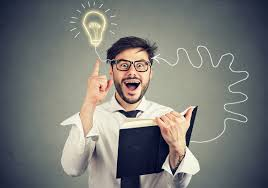
1. A maioria dos veículos usa transmissão manual, sendo a gasolina (Petrol)  o tipo mais comum de combustivel e em segundo lugar, o diesel.

2. As fabricantes: Ford, Volkswagen e Vauxhall são os mais frequentes no conjunto de dados.
___

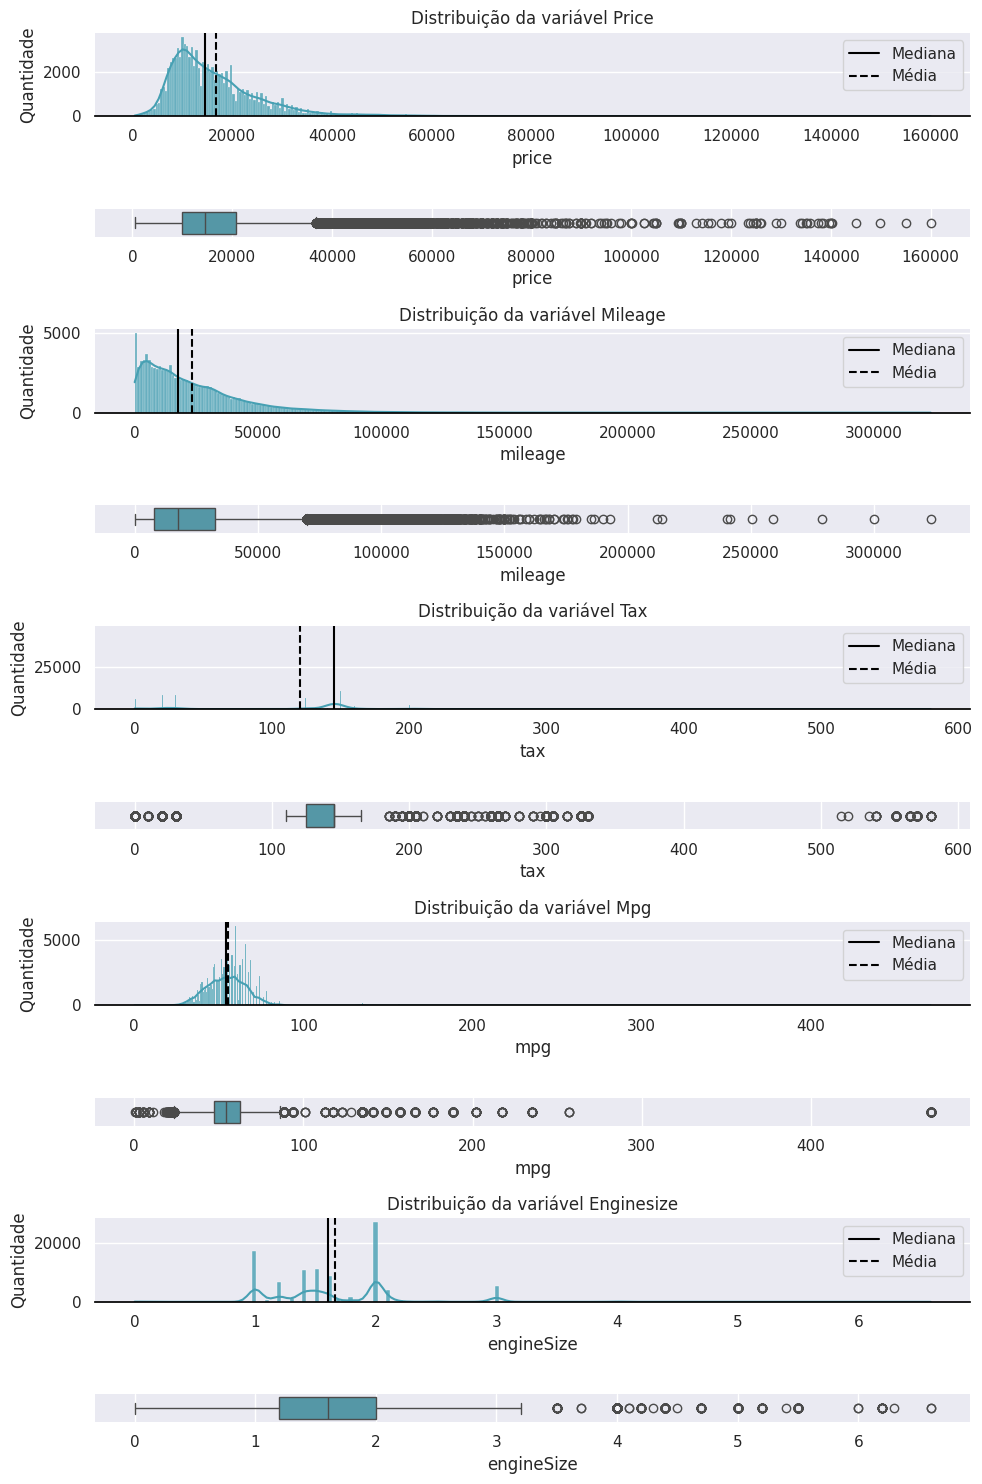

In [ ]:
# @title Variáveis Quantitativas
sns.set_theme(style="darkgrid")
variaveis_quantitativas = ['price', 'mileage', 'tax', 'mpg', 'engineSize']

num_variables = len(variaveis_quantitativas)
num_rows = num_variables * 2
height_ratios = [item for pair in [[3, 1]] * num_variables for item in pair]
fig, axes = plt.subplots(figsize=(10, num_variables * 3), ncols=1, nrows=num_rows, gridspec_kw={"height_ratios": height_ratios})

plot_color = sns.color_palette("Spectral")[5]

for i, variavel in enumerate(variaveis_quantitativas):
    hist_ax_index = i * 2
    boxplot_ax_index = i * 2 + 1
    ax_hist = sns.histplot(data=df, x=variavel, ax=axes[hist_ax_index], kde=True, alpha=.8, color=plot_color)
    ax_hist.axvline(df[variavel].median(), color="black", label="Mediana")
    ax_hist.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax_hist.set(title=f"Distribuição da variável {variavel.capitalize()}", ylabel="Quantidade")
    ax_hist.legend()
    ax_hist.spines["bottom"].set_color("black")
    ax_hist.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax_hist.spines[side].set_visible(False)

    ax_boxplot = sns.boxplot(data=df, x=variavel, ax=axes[boxplot_ax_index], color=plot_color)
    ax_boxplot.set_ylabel("")
    ax_boxplot.set_yticks([])
    for side in ["left", "top", "right", "bottom"]:
        ax_boxplot.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

---

### Interpretação dos gráficos das Variáveis Quantitativas

1. Preço e Quilometragem: as duas variáveis (price e mileage) tem uma grande alta com a maioria dos veículos, concentrada principalmente em valores mais baixos e uma cauda longa de outliers de valores elevados.


2. Taxa: A variável tax é muito concentrada em um valor específico (**aproximadamente 145**), o que possivelmente indica uma taxa comum para boa parte dos veículos, com alguns outliers de taxas mais altas.


3. Eficiência de Combustível (Mpg): A distribuição da eficiência é mais concentrada em torno da média, o que no geral pode dizer que a maior parte dos veículos tem uma eficiência parecida.


4. A cilindrada do motor (engineSize) tem uma distribuição multimodal,onde existem picos claros em tamanhos específicos como os motores com cilindradas de  1.0, 1.5 e 2.0, o que mostra que são categorias de motores populares.


5. Outliers: Todas as variáveis quantitativas tem outliers significativos na extremidade superior, o que pode indicar um numero consideravelmente alto de veículos com algumas características bem atípicas (preços muito altos, quilometragens elevadas, etc.).

---

### Dados faltantes

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

---

Não existem dados faltantes

---

### Análise bivariada

### Relação entre variáveis quantitativas

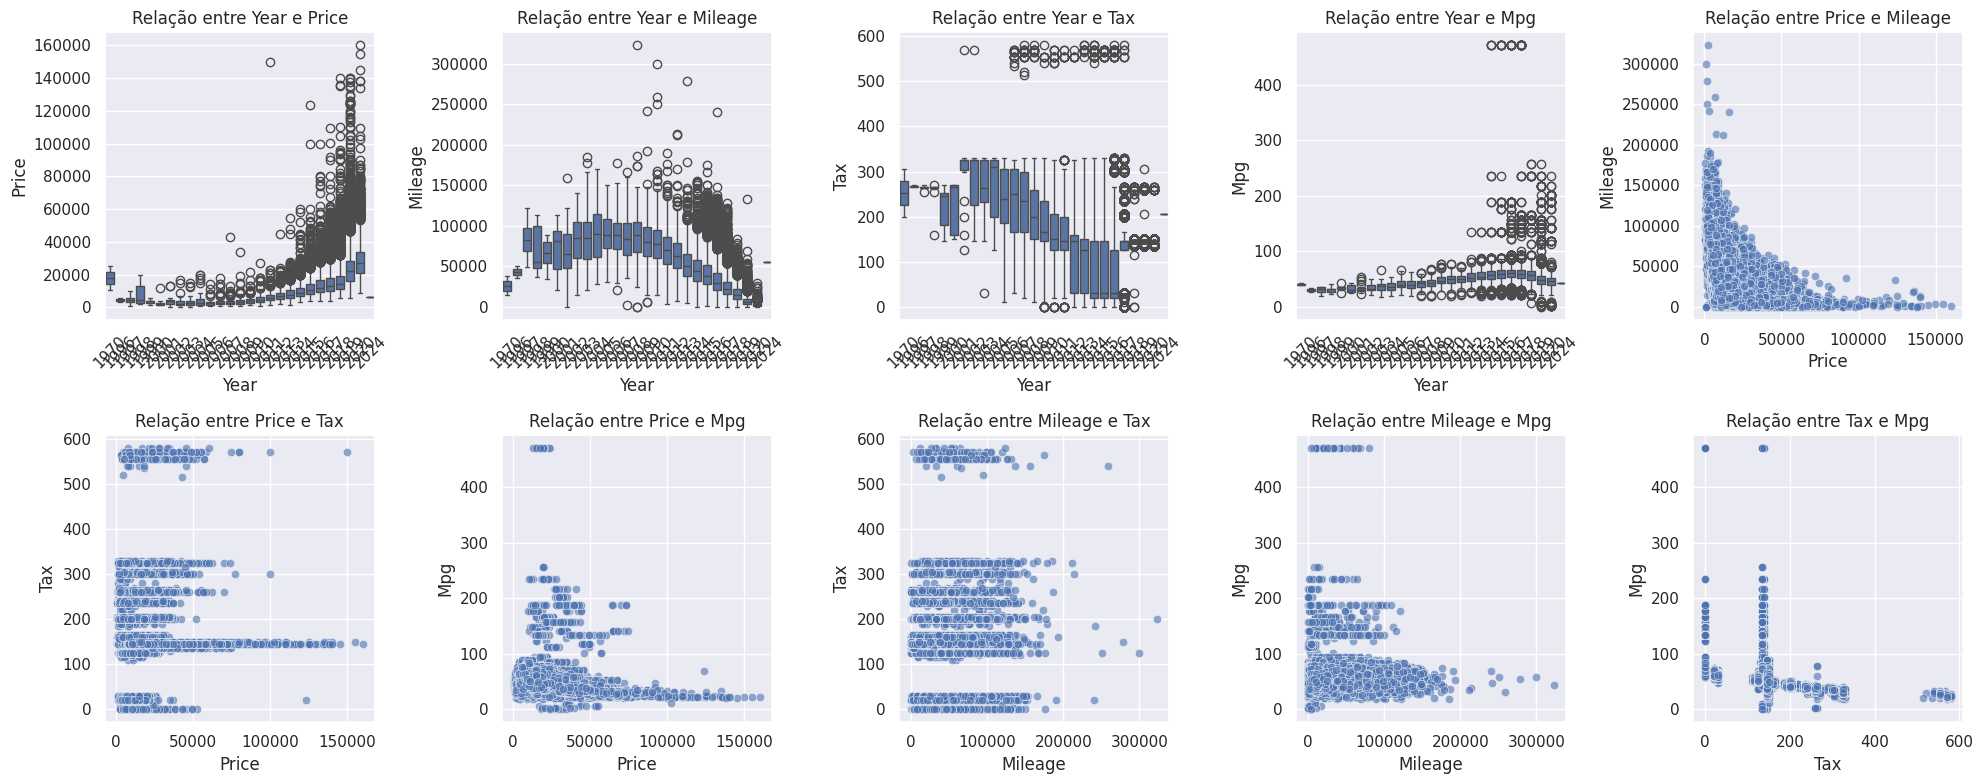

In [ ]:
# @title Comportamento par a par
sns.set_theme(style="darkgrid")
variaveis_quantitativas = ['year', 'price', 'mileage', 'tax', 'mpg']
combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_plots = len(combinacoes)
nrows = 2
ncols = 5
fig, axes = plt.subplots(figsize=(20, 8), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    ax = axes[i]
    subtipo_var1 = df_dict.loc[df_dict['variavel'] == var_1, 'subtipo'].iloc[0]
    subtipo_var2 = df_dict.loc[df_dict['variavel'] == var_2, 'subtipo'].iloc[0]

    if subtipo_var1 == 'Contínua' and subtipo_var2 == 'Contínua':
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=ax, alpha=0.6)
    else:
        if var_1 == 'year':
            sns.boxplot(data=df, x=var_1, y=var_2, ax=ax)
            ax.tick_params(axis='x', rotation=45)
        elif var_2 == 'year':
            sns.boxplot(data=df, x=var_2, y=var_1, ax=ax)
            ax.tick_params(axis='x', rotation=45)
    ax.set(title=f"Relação entre {var_1.capitalize()} e {var_2.capitalize()}")
    ax.set_xlabel(var_1.capitalize())
    ax.set_ylabel(var_2.capitalize())


for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---

### Interpretação dos gráficos das Variáveis Quantitativas par a par

1. Preço e Ano: O preço dos carros tem a tendência de aumentar bastante quando tem um ano de fabricação mais alto, especialmente os mais recentes, com uma enorme disperção de preços em cima de carros novos.


2. Quilometragem e Ano: A quilometragem média tende a diminuir com o ano de fabricação, ja que carros que são mais novos, irão consequentemente ter menos quilometros rodados.


3. Preço e Quilometragem: a relação é inversamente proporcional para qualquer ordem dessas variáveis, o que define claramente a quilometragem como algo **crucial** no preço(quanto maior a quilometragem menor o preço e vice versa).

4. Taxa e Ano/Preço/Quilometragem:no caso da taxa (tax) a relação é mais complexa, com valores bem altos em anos recentes e uma dispersão bem grande, e não há um vínculo claro e linear entre as variáveis preço e quilometragem.
---

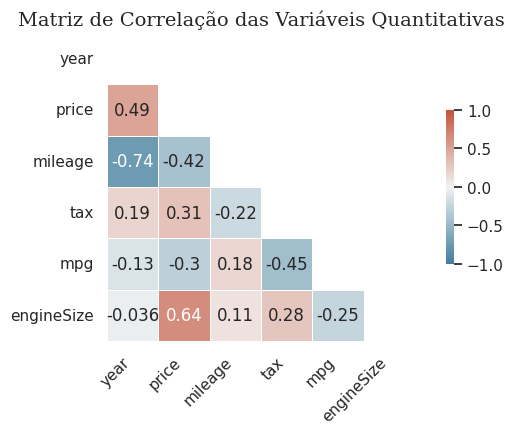

In [ ]:
# @title Correlação
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 4))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Matriz de Correlação das Variáveis Quantitativas', fontsize=14, family='serif')
plt.show()

---
# Leitura da Matriz de variáveis quantitativas

1. A correlação mais visivel  é entre year e mileage (-0.74), o que indica como foi informado anteriormente que carros mais novos tem uma menor quilometragem.

2. price e engineSize tem a correlação positiva mais aguda (0.64), o que sugere que carros com uma maior potencia de cilindradas tem tendencias a preços maiores.


3. price e mileage têm uma correlação negativa (-0.42), ou seja, carros mais caros geralmente têm menor quilometragem.


4. mpg (eficiência de combustível) tem correlações negativas com engineSize (-0.25) e price (-0.30), o que significa que motores com potência maior e carros mais caros tendem a ser menos eficientes.

---

### Relação entre variáveis qualitativas

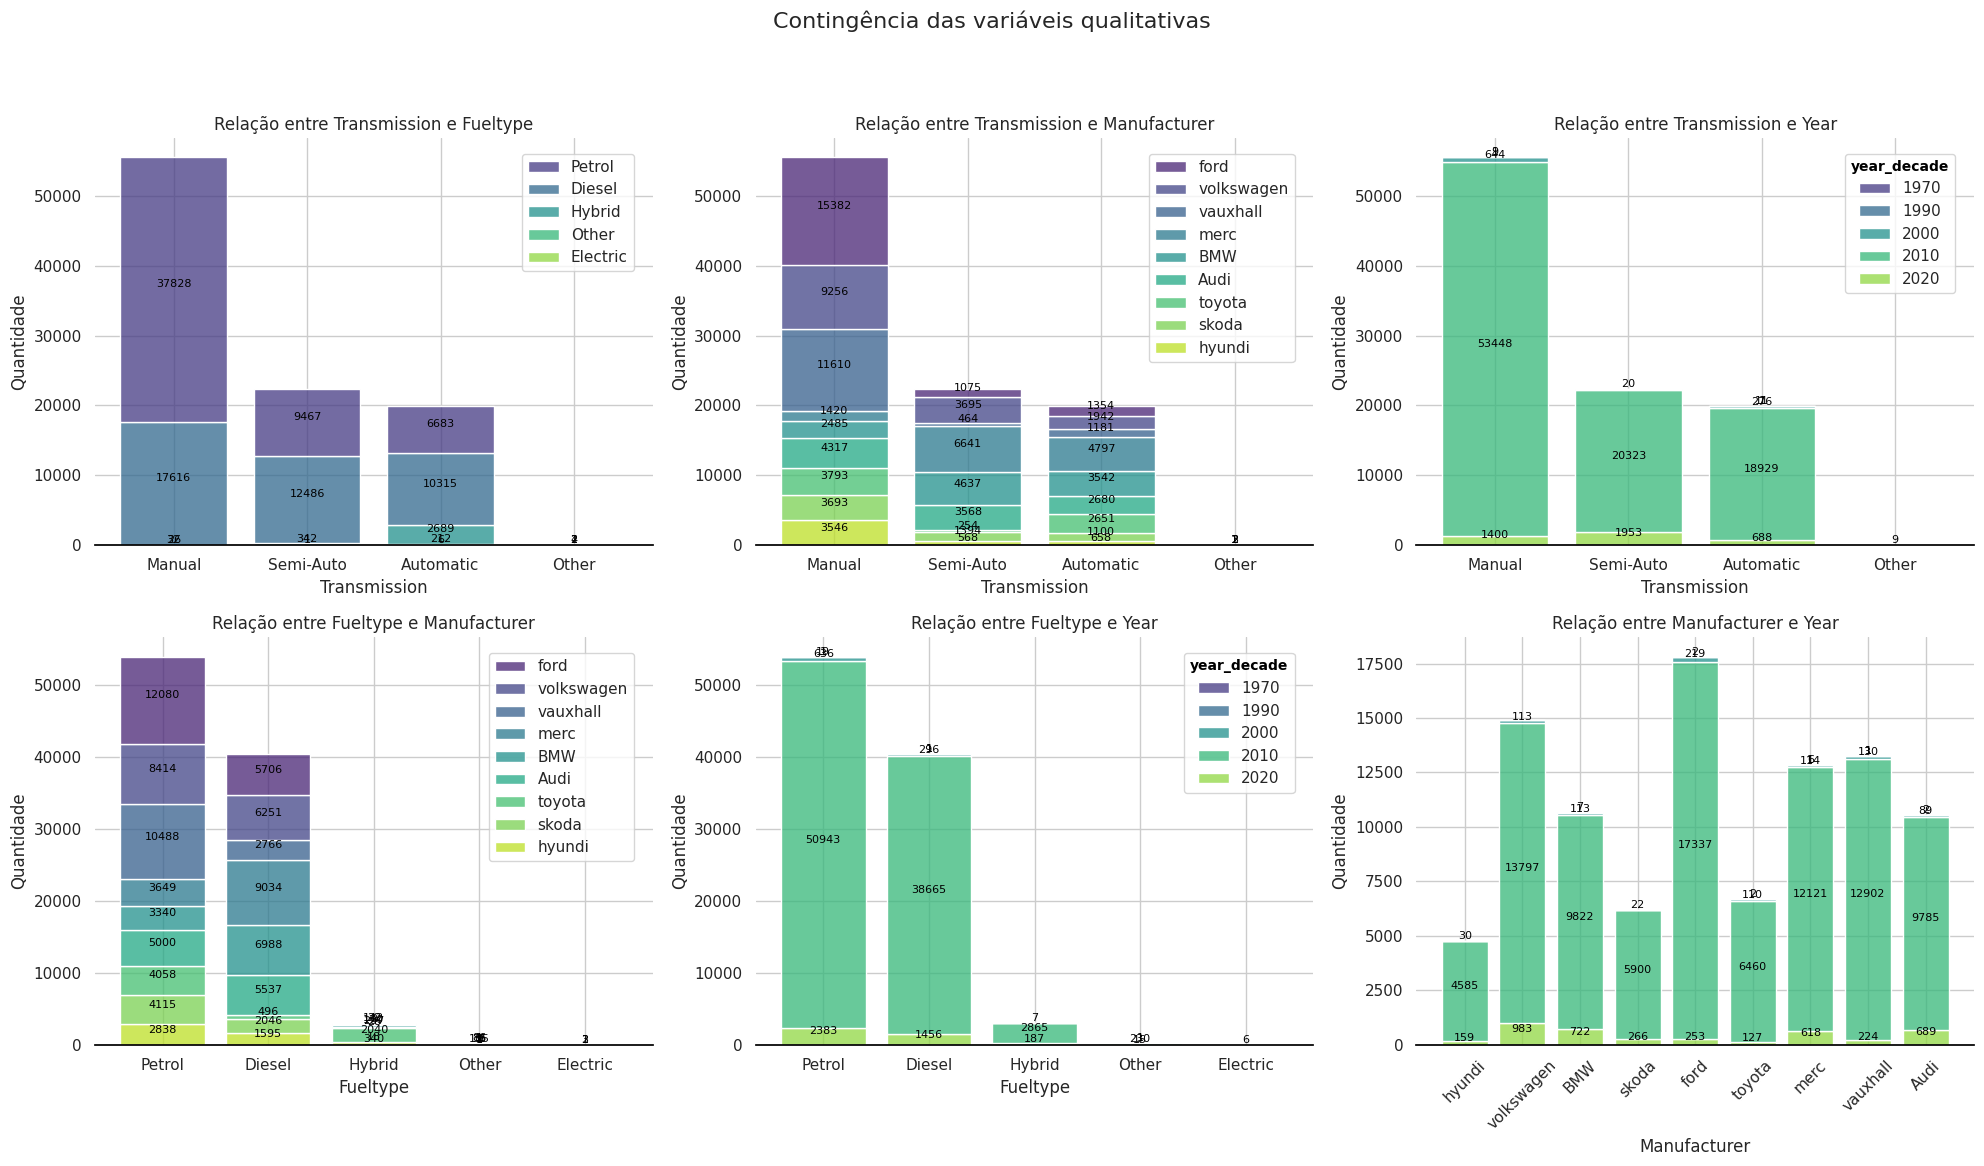

In [ ]:
# @title Contingência
manufacturer_counts = df['Manufacturer'].value_counts()
other_manufacturers = manufacturer_counts[manufacturer_counts < 1000].index
df['Manufacturer_processed'] = df['Manufacturer'].apply(lambda x: 'Other' if x in other_manufacturers else x)
df['year_decade'] = (df['year'] // 10 * 10).astype(str)
combinacoes = [
    ('transmission', 'fuelType'),
    ('transmission', 'Manufacturer_processed'),
    ('transmission', 'year_decade'),
    ('fuelType', 'Manufacturer_processed'),
    ('fuelType', 'year_decade'),
    ('Manufacturer_processed', 'year_decade')
]

ordem = {
    'transmission': ['Manual', 'Semi-Auto', 'Automatic', 'Other'],
    'fuelType': ['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'],
    'Manufacturer_processed': df['Manufacturer_processed'].value_counts().index.tolist(),
    'year_decade': sorted(df['year_decade'].unique())
}

paleta = {
    'transmission': sns.color_palette("viridis", n_colors=len(ordem['transmission'])),
    'fuelType': sns.color_palette("viridis", n_colors=len(ordem['fuelType'])),
    'Manufacturer_processed': sns.color_palette("viridis", n_colors=len(ordem['Manufacturer_processed'])),
    'year_decade': sns.color_palette("viridis", n_colors=len(ordem['year_decade']))
}

sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(figsize=(20, 12), ncols=3, nrows=2, squeeze=True)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    ax = axes[i]
    order_x = ordem.get(var_1, None)
    hue_order_val = ordem.get(var_2, None)
    palette_val = paleta.get(var_2, None)
    sns.histplot(data=df, x=var_1, hue=var_2, ax=ax, multiple='stack',
                 shrink=0.8,
                 palette=palette_val, hue_order=hue_order_val, stat='count')
    for container in ax.containers:
        for patch in container.patches:
            height = patch.get_height()
            if height > 0:
                ax.text(patch.get_x() + patch.get_width() / 2,
                        patch.get_y() + height / 2 + 3,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=8, color='black')
    ax.set(
        title=f"Relação entre {var_1.replace('_processed', '').replace('_decade', '').capitalize()} e {var_2.replace('_processed', '').replace('_decade', '').capitalize()}",
        ylabel="Quantidade"
    )
    ax.set_xlabel(var_1.replace('_processed', '').replace('_decade', '').capitalize())
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")
    if var_1 == 'year_decade' or var_1 == 'Manufacturer_processed':
        ax.tick_params(axis='x', rotation=45)

    if i == len(combinacoes) - 1:
        if ax.legend_ is not None:
            ax.legend_.remove()
    else:
        sns.move_legend(
            ax, "upper right",
            bbox_to_anchor=(0.98, 0.98),
            ncol=1,
            title=None,
            frameon=True
        )
        if var_2 == 'year_decade':
            ax.legend_.set_title('year_decade', prop={'size':'small', 'weight':'bold'})
            ax.legend_.get_title().set_color('black')
plt.subplots_adjust(bottom=0.15, hspace=1.0, wspace=0.3)
plt.suptitle("Contingência das variáveis qualitativas", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()

---

#Interpretação dos gráficos de Contingência das Variáveis Qualitativas:

1. Relação entre Transmissão e Tipo de Combustível (Transmission x FuelType):
Os carros que usam transmissão Manual usam de maneira predominante gasolina ou disel, e embora gasolina seja mais comum, em transmissões Semi-Automáticas e Automáticas a gasolina e disel continua na frente, mas a proporção de veículos que é híbrida começa a se destacar em relação aos veículos com transmissão manual.



2. Relação entre Transmissão e Fabricante (Transmission x Manufacturer):
As fabricantes: Ford, Volkswagen e Vauxhall são as com maior volume de carros no dataset, especialmente os com transmissão Manual.

 No caso dos carros com transmissão Semi-Automática e Automática, fabricantes como Mercedes e BMW se destacam em quantidade, sugerindo preferência por essas transmissões em seus modelos.



3. Relação entre Transmissão e Década do Ano (Transmission x Year_decade):
A lista de dados tem uma quantidade alta de carros de décadas mais recentes como os anos 2000, 2010 e, principalmente, 2020, e dentre esses casos os de transmissão manual são totalmente dominados por modelos da década de 2020.
 Já os carros Semi-Automáticos tem uma faixa de utilização maior em meados de 2010 e os automáticos nos anos 2000, o que pode indicar uma tendencia de popularidade dessas transmissões ao longo do tempo nessa lista de dados.


4. Relação entre Fabricante e Década do Ano (Manufacturer x Year_decade):

     Para quase todos os fabricantes, a maioria dos carros na lista de dados é das décadas de 2000, 2010 e 2020, e a década de 2020 sendo a mais representativa,existem poucos registros de carros das décadas de 1970, 80 e 90 para qualquer fabricante se comparado com as décadas mais atuais da lista de dados, indicando que essa lista foca **principalmente** em veículos mais modernos e com isso as fabricantes: Ford, Volkswagen, Vauxhall, Mercedes, BMW e Audi, são as com maior volume de carros nessa lista de dados, e de forma predominante nas décadas mais recentes.

---

###Relação entre variáveis quantitativas e qualitativas

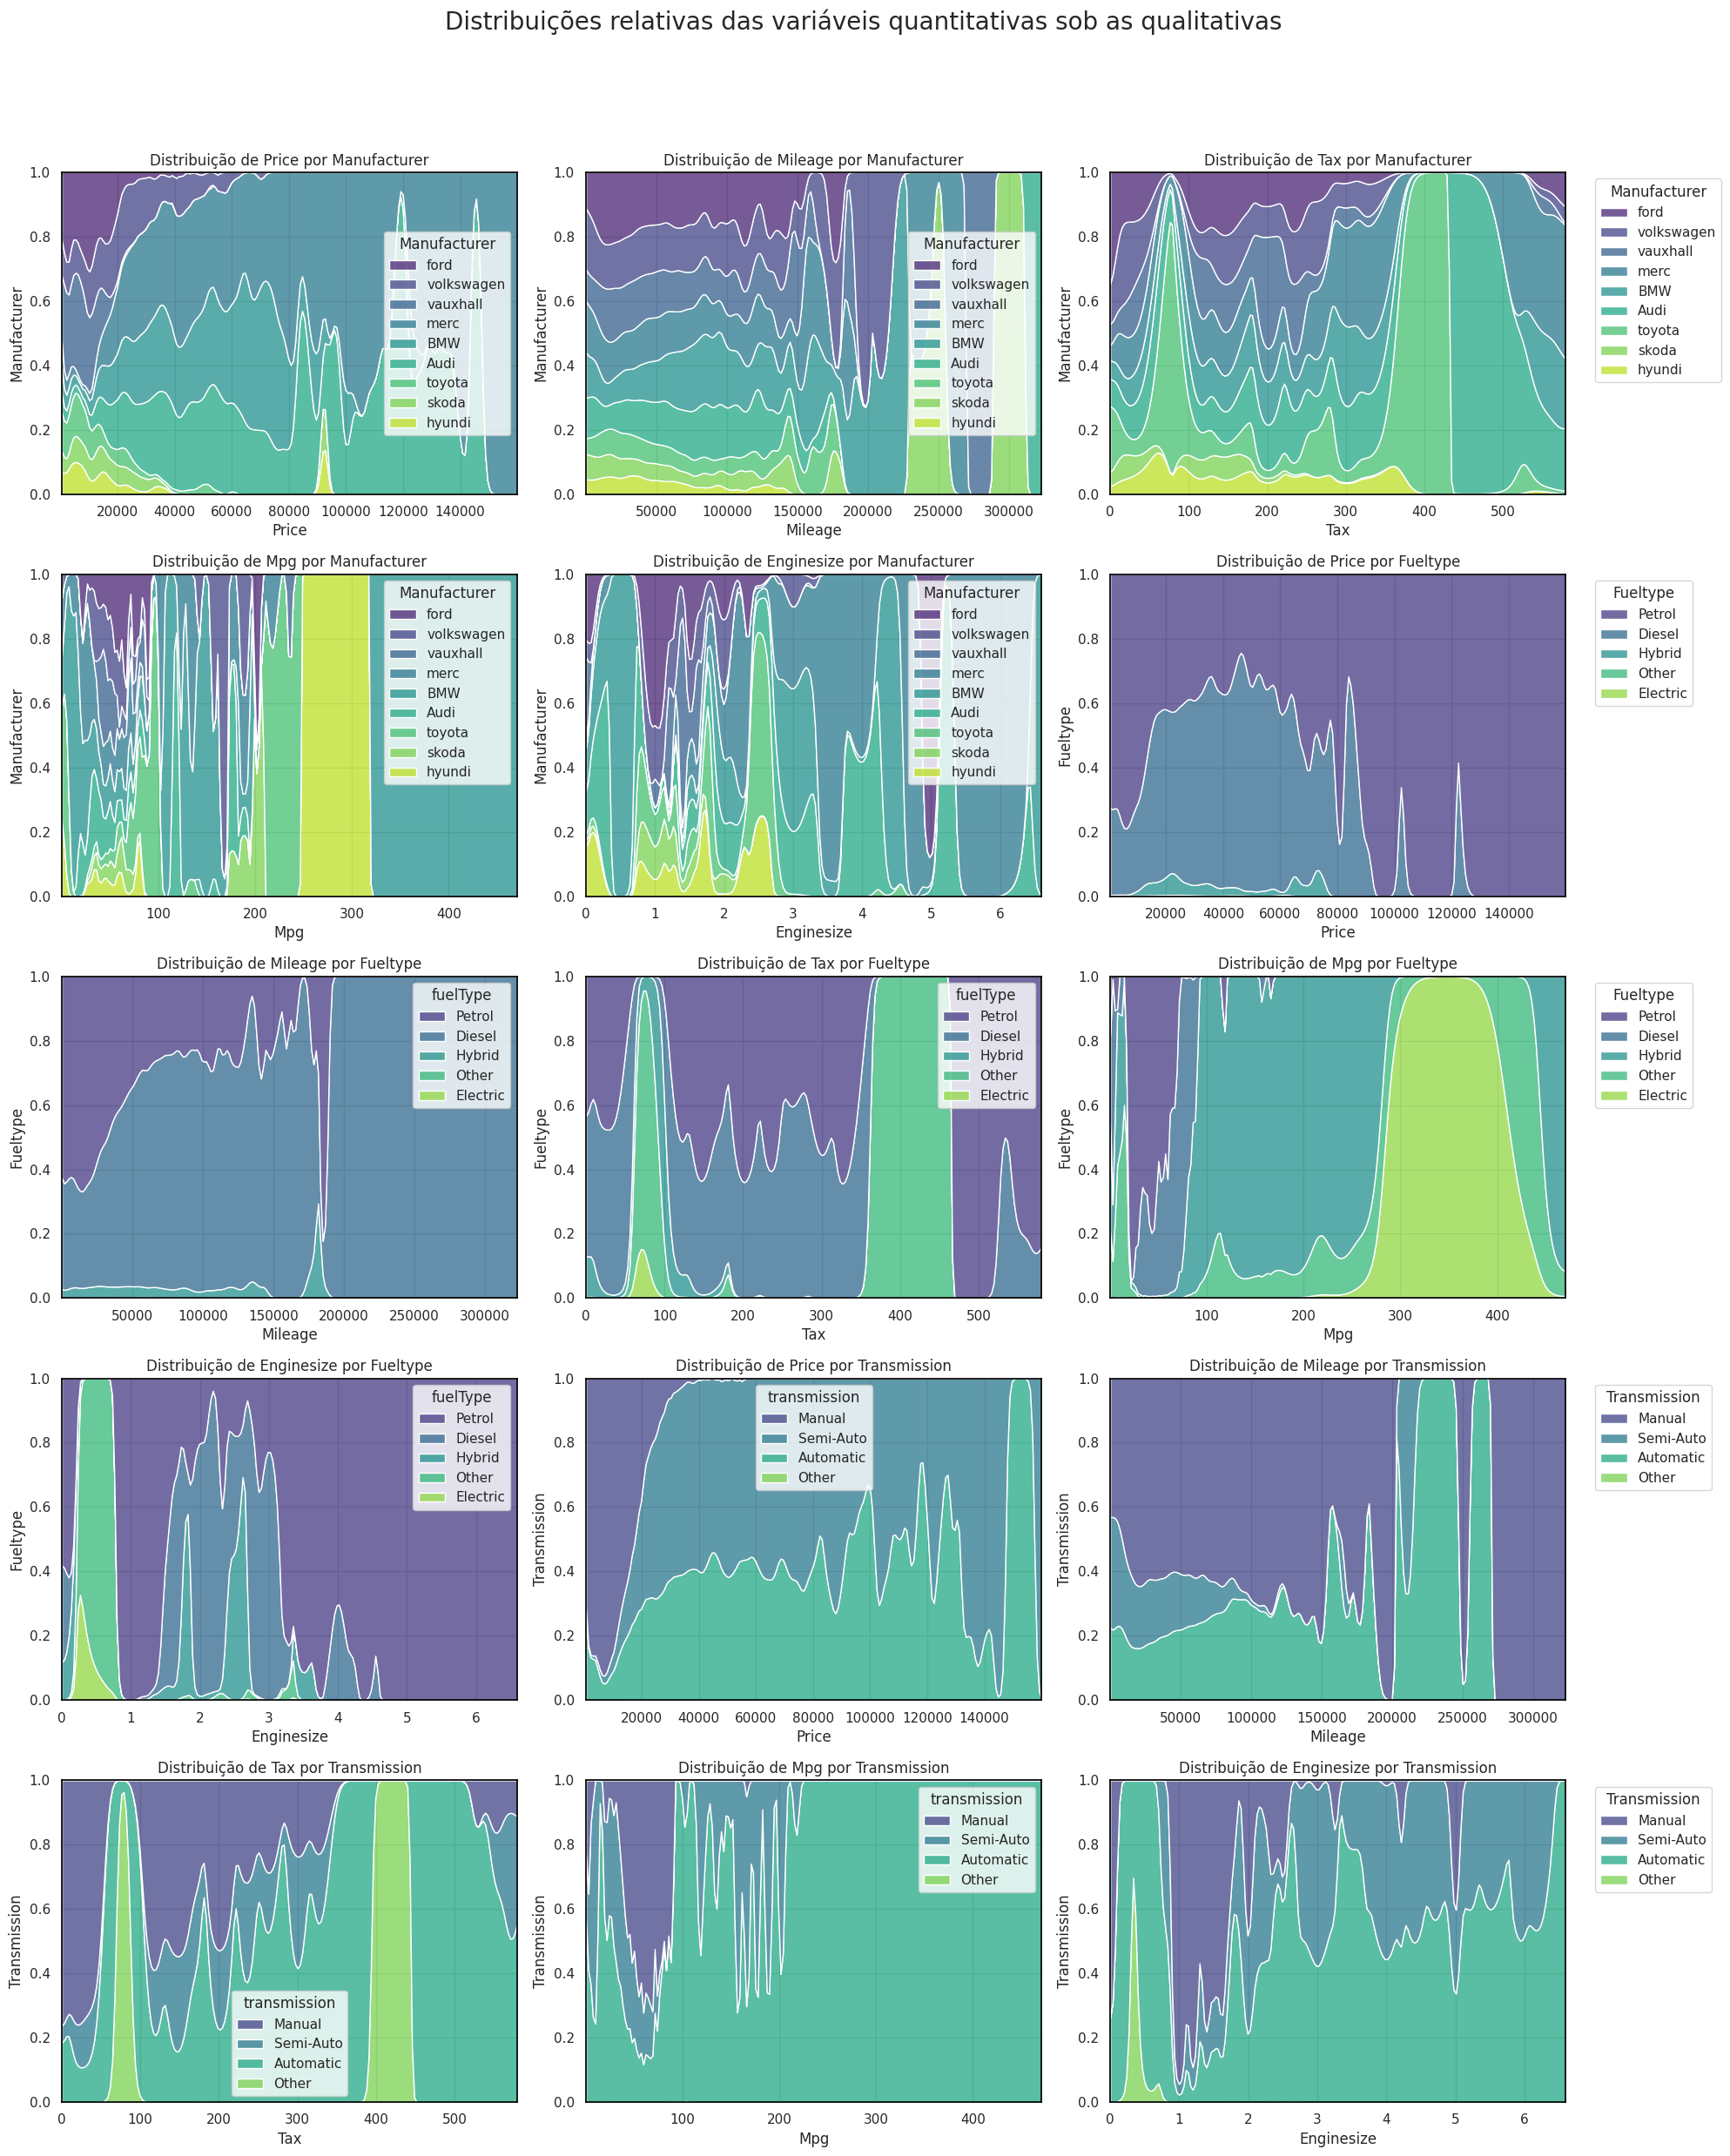

In [ ]:
# @title Distribuição relativa
palette_dict = {
    'Manufacturer': sns.color_palette("viridis", n_colors=len(df['Manufacturer'].unique())),
    'fuelType': sns.color_palette("viridis", n_colors=len(df['fuelType'].unique())),
    'transmission': sns.color_palette("viridis", n_colors=len(df['transmission'].unique()))
}
def kde_plot_relative(df, x_qual, y_quant, ax, i):
    """Gera um KDE plot de distribuição relativa."""
    order = sorted(df[x_qual].unique()) if x_qual == 'year' else df[x_qual].value_counts().index.tolist()
    palette = palette_dict.get(x_qual)
    sns.kdeplot(
        data=df, x=y_quant, hue=x_qual, hue_order=order, cut=0,
        multiple="fill", palette=palette, ax=ax
    )
    ax.set(
        title=f"Distribuição de {y_quant.capitalize()} por {x_qual.capitalize()}",
        ylabel=x_qual.capitalize(),
        xlabel=y_quant.capitalize()
    )
    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")
    if i % 3 == 2:
        sns.move_legend(
            ax, "upper left",
            bbox_to_anchor=(1.05, 1),
            ncol=1,
            title=x_qual.capitalize(),
            frameon=True
        )
variaveis_quali = ['Manufacturer', 'fuelType', 'transmission']
variaveis_quanti = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
combinacoes = list(itertools.product(variaveis_quali, variaveis_quanti))
num_plots = len(combinacoes)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols
fig, axes = plt.subplots(figsize=(20, nrows * 5), ncols=ncols, nrows=nrows, squeeze=False, sharey=False)
axes = axes.flatten()
for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    kde_plot_relative(df, var_qualitativa, var_quantitativa, axes[i], i)
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Distribuições relativas das variáveis quantitativas sob as qualitativas', y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

---
# Interpretação dos gráficos das Variáveis Quantitativas par a par

1. Dominância de Fabricantes: os fabricantes: Ford, Volkswagen e Vauxhall, conseguem manter uma proporção bem significativa de veículos em **TODAS** as faixas de preço, quilometragem, MPG e EngineSize, o que reflete a sua presença bem grande na lista de dados.

2. Marcas Premium: BMW, Mercedes e Audi tendem a ter uma representação maior em faixas de preço mais elevadas e com motores de maior cilindrada (acima de 2.0 litros).


3. Eficiência de Híbridos: Esses por sua vez tendem a ser bem mais economicos e com uma potência quase fixa (geralmente entre 1.5 e 2.0 litros), confirmando sua eficiência e foco em motores menos potentes.


4. Distribuição de Transmissões: as Manuais são comuns em qualquer faixa de preço, MPG e potência de motor, ja os da categoria Semi-Automaticos ja se encaixam mais em veículos de medio e alto preço e com menor quilometragem.
---

# Gráficos das análises bivariadas

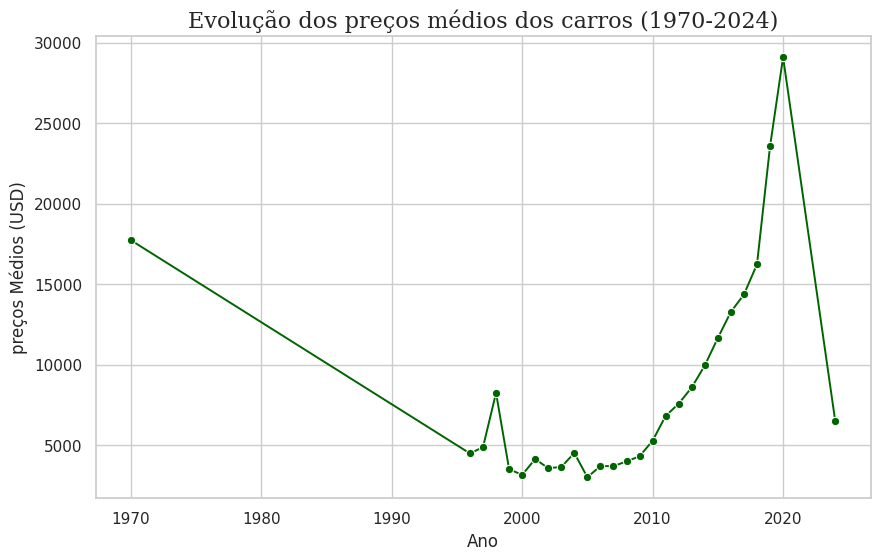

In [ ]:
media_precos = df.groupby('year', as_index=False)['price'].mean()

# @title preço médio por ano (preços ao longo do tempo)
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_precos, x='year', y='price', marker='o', linewidth=1.4, color='darkgreen')
font1={'fontsize': 18, 'family': 'serif'}
plt.title('Evolução dos preços médios dos carros (1970-2024)', fontdict= {'family':'serif', 'fontsize':16})
plt.xlabel('Ano')
plt.ylabel('preços Médios (USD)')
plt.grid(True)
sns.set_style("whitegrid")
plt.show()

---
# Interpretação do gráfico da evolução da média de preços de carros


Os preços médios dos carrosdesde o inicio cronológico do conjunto de dados mostram uma tendência de queda, que se extende até meados  do início dos anos 2000, e em seguida por um aumento constante e acentuado que se inicia partindo de 2005 e atingindo o pico em 2020, e após esse período, tem uma queda abrupta no valor dos preços médios, o que pode indicar uma mudança na no mercado de carros mais recentes ou até na composição dos dados.

---

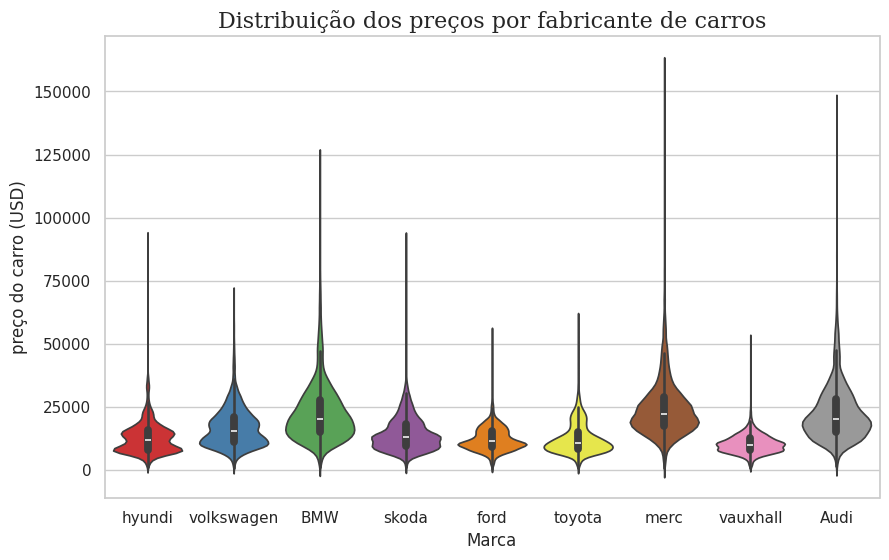

In [ ]:
# @title preço por marcas de carro
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Manufacturer', y='price', palette='Set1', hue='Manufacturer', legend=False)

plt.title('Distribuição dos preços por fabricante de carros', fontdict= {'family':'serif', 'fontsize':16})
plt.xlabel('Marca')
plt.xticks(rotation=0)
plt.ylabel('preço do carro (USD)')
plt.show()

---
# Interpretação do gráfico de Distribuição de preços por fabricantes

1. Fabricantes como BMW, Mercedes e Audi tem uma distribuição de preços mais elevada e com uma maior variação, indicando que produzem carros mais caros e com uma gama de preços mais ampla.

2. As marcas Hyundai, Volkswagen, Ford e Vauxhall têm uma distribuições de preços mais concentradas em faixas mais baixas, o que pode indicar que são fabricantes de veículos mais acessíveis e populares.


---

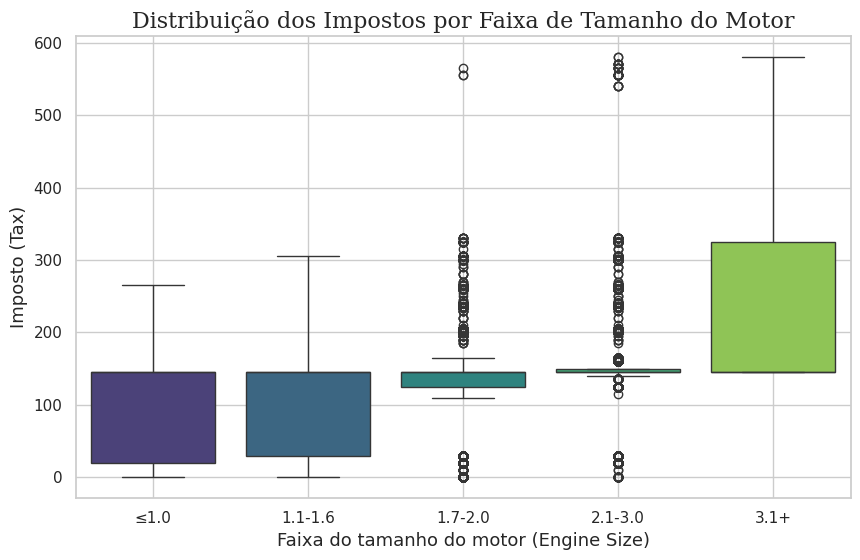

In [ ]:
# @title Relação entre tamanho do motor e imposto
bins = [0, 1.0, 1.6, 2.0, 3.0, 5.0]
labels = ['≤1.0', '1.1-1.6', '1.7-2.0', '2.1-3.0', '3.1+']
df['faixa_motor'] = pd.cut(df['engineSize'], bins=bins, labels=labels)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='faixa_motor', y='tax', palette='viridis', hue='faixa_motor', legend=False)
plt.title('Distribuição dos Impostos por Faixa de Tamanho do Motor', fontsize=16, fontdict={'family':"serif"})
plt.xlabel('Faixa do tamanho do motor (Engine Size)', fontsize=13)
plt.ylabel('Imposto (Tax)', fontsize=13)
plt.grid(True)
sns.set_style("whitegrid")
plt.show()

---
# Interpretação do gráfico por faixa de tamanho do motor

1. Para a maioria das faixas de tamanho de motor (até 3.0 litros), a mediana do imposto gira em torno de 145, mas quando vamos para os motores entre 1.7 e 3.0 litros, é mostrada uma maior concentração de impostos nesse valor, com muitos outliers em impostos muito baixos ou muito altos.


2. Veículos com motores maiores (3.1+ litros) apresentam uma mediana de imposto bem mais alta e uma  dispersão nos valores de imposto enorme se for comparado com as outras faixas de preço.

---

/tmp/ipython-input-49-54958110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuelType', y='mpg', palette='Greens')


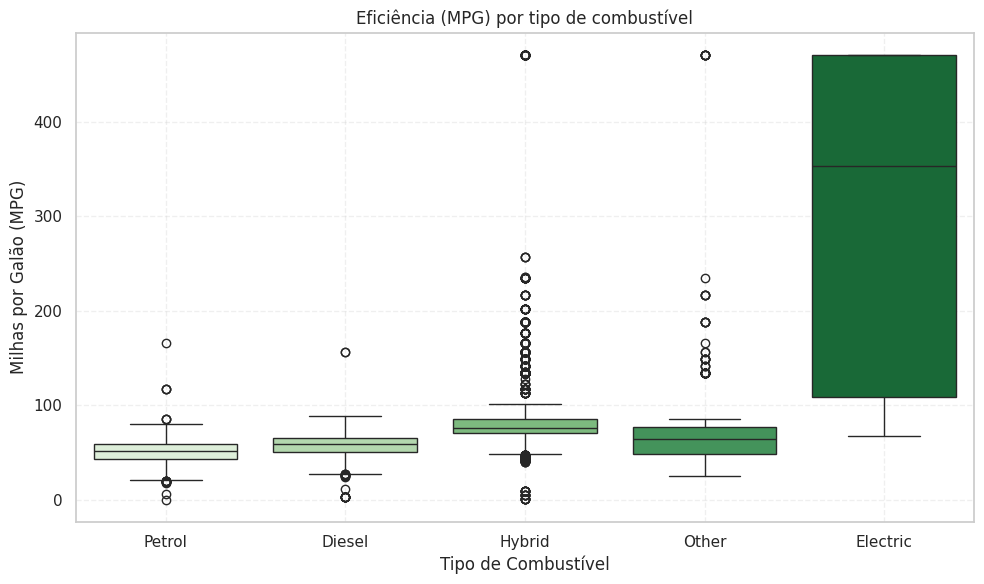

In [ ]:
# @title Eficiência por galão (mpg) por tipo de combustível
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuelType', y='mpg', palette='Greens')
plt.title('Eficiência (MPG) por tipo de combustível', )
plt.xlabel('Tipo de Combustível')
plt.ylabel('Milhas por Galão (MPG)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

---
# Interpretação do gráfico de eficiência (MPG) por tipo de combustível

1. Veículos elétricos (Electric) demonstram a maior eficiência (MPG) e a menor variabilidade, e com a mediana mais alta dentre todos os comparados.


2. Veículos do tipo híbrido (Hybrid) tem uma eficiência (MPG) maior que os a gasolina (Petrol) e diesel (Diesel), e isso com uma distribuição mais ampla e alguns outliers de altissima eficiência.

---

# Análise multivariada

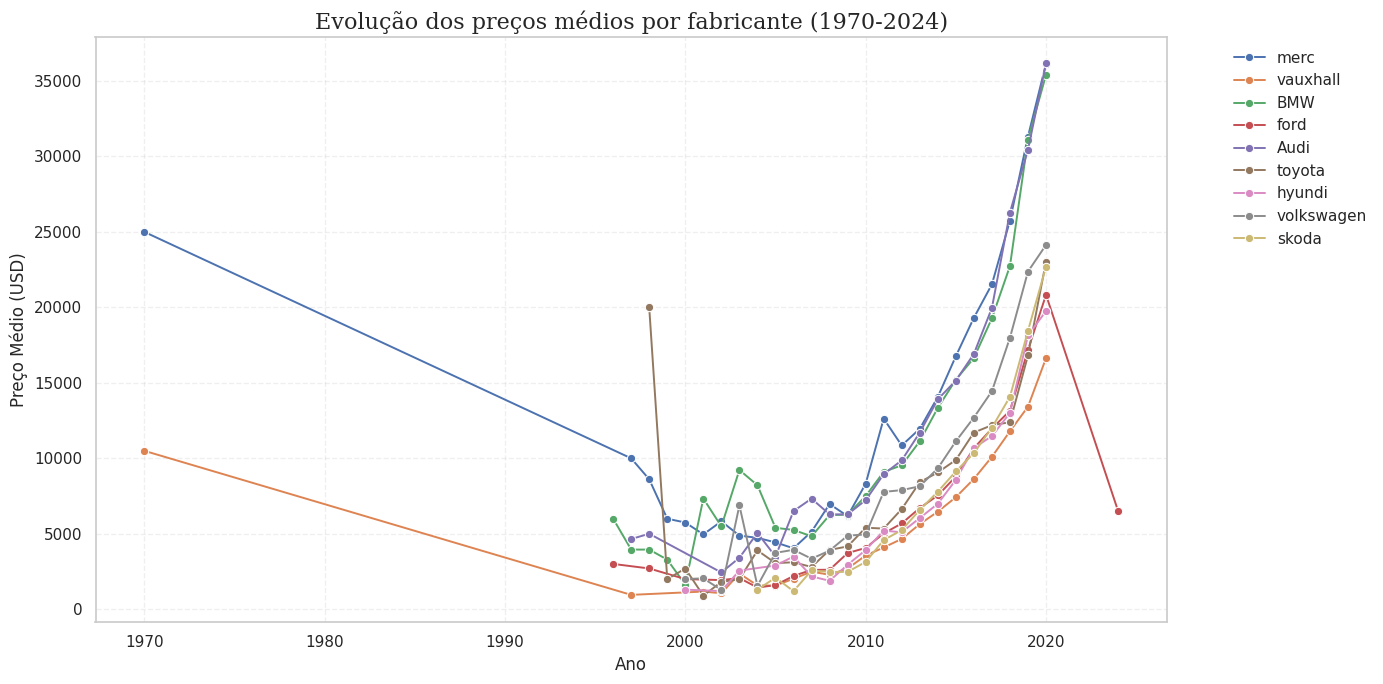

In [ ]:
# @title Evolução dos preços médios por fabricante
media_precos_fabricante = df.groupby(['year', 'Manufacturer'])['price'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=media_precos_fabricante, x='year', y='price', hue='Manufacturer', marker='o', linewidth=1.4)

plt.title('Evolução dos preços médios por fabricante (1970-2024)', fontsize=16, fontdict={'family': 'serif'})
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

---
# Interpretação do gráfico de Evolução de preços por fabricante

1. A partir de 2000, é observado um aumento de maneira geral nos preços para a vasta maioria dos fabricantes, com uma concentração bem maior de dados nos anos mais recentes.

2. Os fabricantes como BMW, Mercedes e Audi apresentam de forma consistente veículos nas faixas de preço mais altas ao longo do tempo, especialmente nos anos mais recentes.
---

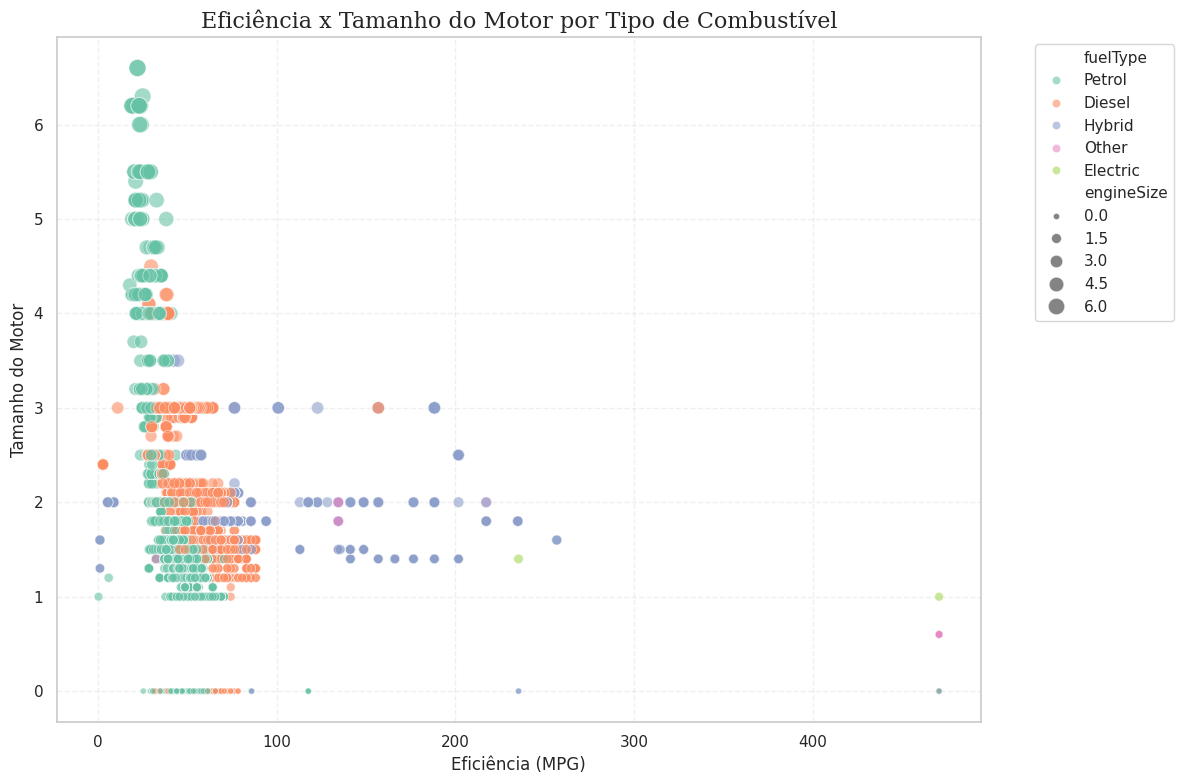

In [ ]:
# @title mpg (eficiência) e tamanho do motor por tipo de combustível
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mpg', y='engineSize', hue='fuelType', size='engineSize', alpha=0.6, palette='Set2', sizes=(20, 150))
plt.title('Eficiência x Tamanho do Motor por Tipo de Combustível', fontsize=16, fontdict={'family': 'serif'})
plt.xlabel('Eficiência (MPG)', fontsize=12)
plt.ylabel('Tamanho do Motor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)
plt.tight_layout()
plt.show()

---
# Interpretação do gráfico de tipo de combustível em relação à eficiência e tamanho de motor.

1. Motores Pequenos e Eficiência: A maioria dos veículos, principalmente os movidos à gasolina e diesel, tem uma concentração em potências menores (abaixo de 3.0) e em faixas de eficiência (MPG) mais baixas por gastarem mais.


2. Híbridos e Elétricos: Esses tendem a apresentar uma maior eficiência (MPG) em relação aos outros tipos de combustível, com os elétricos mostrando os valores mais altos de MPG.


---

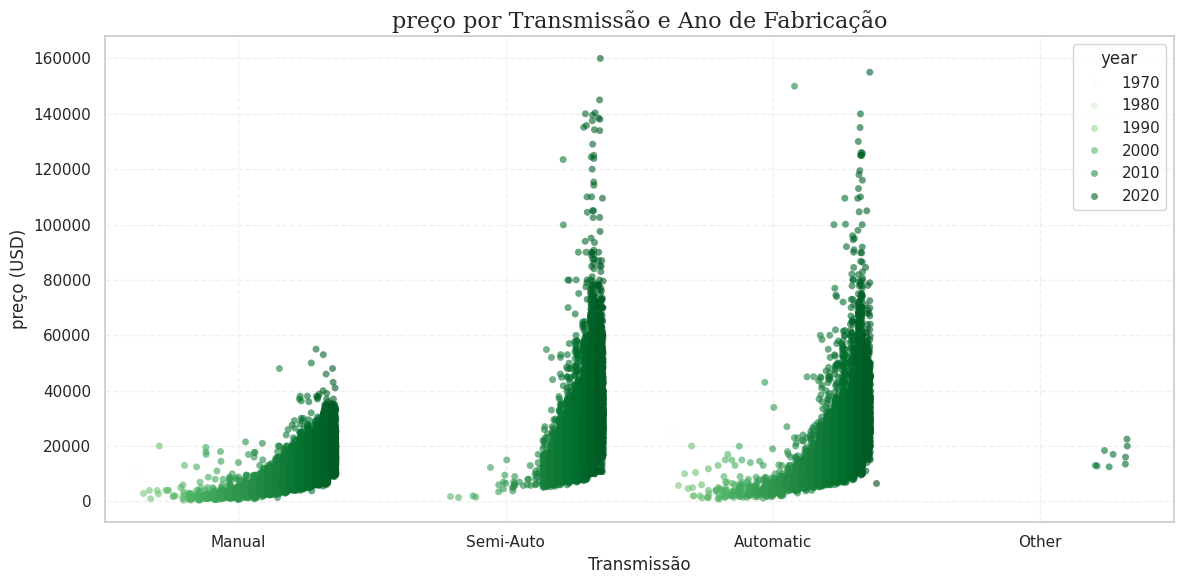

In [ ]:
# @title transmissão x preço x ano
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='transmission', y='price', hue='year',
              palette='Greens', dodge=True, alpha=0.6, jitter=0.25)
plt.title('preço por Transmissão e Ano de Fabricação', fontsize=16, fontdict={'family': 'serif'})
plt.xlabel('Transmissão', fontsize=12)
plt.ylabel('preço (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

---
# Interpretação do gráfico de Ano de fabricação em relação à tipo de transmissão e preço em Dólar

1. Mesmo levando em consideração todos os tipos de transmissão, os valores mais altos ainda são dos veículos mais recentes (cores mais escuras), indicando que carros novos são mais caros independentemente do tipo de transmissão.

2. Transmissões Semi-Automáticas e Automáticas tem uma faixa de preços significativamente mais alta e também uma maior dispersão de valores em comparação com a transmissão Manual.
---

## Sumário de insights e hipóteses

 Ao final da análise exploratória, identificamos padrões e tendências significativas que caracterizam o conjunto de dados de veículos:

1. Perfil Geral do conjunto de dados: O conjunto de dados é de maneira predominante, composto por veículos mais recentes (principalmente das décadas de 2010 e 2020), com forte presença de transmissões manuais e combustíveis a gasolina e diesel. Fabricantes como Ford, Volkswagen e Vauxhall são os mais representados em volume.

2. Relação Preço-Idade-Quilometragem: Observamos uma clara tendência de aumento dos preços dos veículos junto com o ano de fabricação (carros mais novos são mais caros), e uma relação inversa com a quilometragem (carros mais caros tendem a ter menor quilometragem). Há uma hipótese de que veículos muito antigos possam ter seu preço valorizado por se tornarem itens de colecionador, embora a maioria dos dados seja de carros recentes.

3. Eficiência e Tipos de Combustível: Veículos híbridos e, especialmente, elétricos demonstram uma eficiência de combustível (MPG) significativamente superior em comparação com os veículos a gasolina e diesel, concentrando-se em faixas de MPG mais elevadas.

4. Impostos e Tamanho do Motor: A taxa de imposto (tax) incide majoritariamente em um valor padrão para a maioria dos veículos. No entanto, veículos com motores de maior cilindrada (acima de 3.0 litros) apresentam uma faixa de imposto notavelmente mais alta e com maior variabilidade.

5. Posicionamento de Fabricantes: Marcas como BMW, Mercedes e Audi consistentemente se posicionam em faixas de preço mais elevadas e com maior variabilidade, enquanto fabricantes como Hyundai, Volkswagen e Ford oferecem veículos em faixas de preço mais acessíveis.


**Desafios e Observações**: A presença de valores extremos (outliers) em variáveis como preço, quilometragem e imposto é notável e pode demandar tratamento específico em outras análises futuras. A queda de preços observada em 2018 e 2020 no gráfico de evolução de preços médios gerais merece investigação mais aprofundada para entender suas causas.